<a href="https://colab.research.google.com/github/MuraliKrishna454/Capstone-peoject-eda/blob/Play_Store_App_Review_Analysis_Capstone_Project.ipynb/Play_Store_App_Review_Analysis_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Loading file into colab and analysing dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Capstone_One_EDA/PlayStoreAppReview/Copy of Play Store Data.csv')

df.head(5) # first five records of a dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.tail(5) # to get last five records of a dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df.shape # shape of dataframe

(10841, 13)

In [ ]:
df_copy = df.copy() #copying complete dataset for safer side


In [ ]:
df_copy.describe() # To know Central limit of columns contatining numeric values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df_copy.info() # to get overview over dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_copy.isnull().sum() # to get the sum of null values in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 1. Cleaning DATA/ DATA Wrangling

## 1.1 Dealing with Outliers


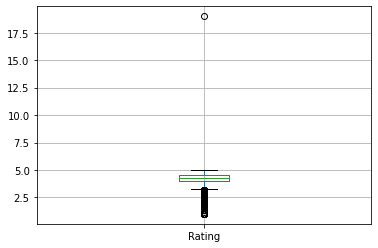

In [ ]:
df_copy.boxplot() #to see whether are there any outlier

In [ ]:
df_copy[df_copy['Rating'] > 5] # to get record having ratings values which are/is above 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#observing above record we feel that the APP column value is merged with category value
# in order to slice App value we need length of APP values in that particular record
#to know the length of App of index 10472
len(df['App'][10472])

39

In [ ]:
# I found in record 10472 all the field values are shifted towards left
# so i made a try to set them and if i am unsuccessful will drop the record


col = list(df.columns)
# print(col)

idx = df_copy.index[df['Rating'] > 5].tolist()[0]
df_copy.loc[idx,'Rating'] = float(df.loc[idx, col[1]])
df_copy.loc[idx, col[0]] = df.loc[idx, col[0]][0:16]
df_copy.loc[idx, col[1]] = df.loc[idx, col[0]][16:40]

for j in range(2,len(col)-1):
  df_copy.loc[idx, col[j+1]] = df.loc[idx, col[j]]
  
df_copy[idx:idx+1]

# df_copy[col[0]][df_copy.index[df_copy['Rating'] > 5].tolist()[0]][0:16]
# the above code in statement,
# I had took concept help from google to get the index of particular record


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi,Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


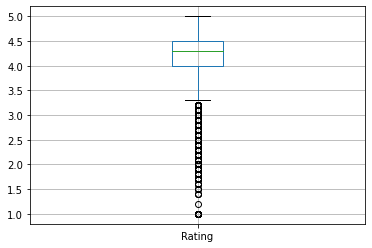

In [ ]:
# now the record looks clean and acceptable
# let's again check whether are there any outliers

df_copy.boxplot()

## 1.2 Dealing with Duplicate records

In [ ]:
# to check Whether are there any duplicates
boolean = df_copy['App'].duplicated().any()
boolean

True

In [ ]:
# to check count of duplicate records
df_copy['App'].value_counts().head(5)

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Name: App, dtype: int64

In [ ]:
# to see the duplicate records 
df_copy[df_copy['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
#we have decided to drop duplicates by only keeping first record in dataframe
df_copy.drop_duplicates(keep='first', inplace=True)
df_copy.shape # we will find decrease in  number of records

(10358, 13)

## 1.3 Filling/ Imputating of missing data


In [ ]:
df_copy.isnull().sum() # to check count of nll values in each column

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd101c28c90>]],
      dtype=object)

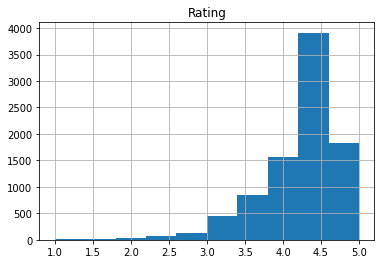

In [ ]:
df_copy.hist() # its seems to be like skewed right side

In [ ]:
# creating function to update series of rating
def imputate_rating(ser):
  return ser.fillna(ser.median())
## as data skewed median value is selected to replace the missing values in Ratings column

In [ ]:
# updating series rating which are null values
df_copy['Rating'] = df_copy['Rating'].transform(imputate_rating)

In [ ]:
df_copy.isnull().sum() # we will found ratings columns is now free from null values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
## observing data we found that Category value is same as Genres in all cases
## so, as there is only record is to be updated we are filling it with category
## data
df_copy['Genres'].fillna(df_copy.loc[idx,'Category'],inplace= True)
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
## As all the above missing values are Qualitative data , we have decided to 
## fill them will most repitative value in that series nothing but mode of 
##that series
df_copy['Type'].fillna(df_copy['Type'].mode().values[0], inplace = True)
df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode().values[0], inplace = True)
df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode().values[0], inplace = True)

df_copy.isnull().sum() ## we will see all null values in every columns are vanished

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 1.4 DATA formatting
#### Now till here we have handled the dataset with missing values
#### However now we need to look at the format of the data like for installs, price and review field should be in numerics

In [ ]:
df_copy['Price'] = df_copy['Price'].apply(lambda x : float(str(x).replace('$','')) if '$' in str(x) else float(str(x)))
df_copy['Installs'] = df_copy['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
df_copy['Installs'] = df_copy['Installs'].apply(lambda x : float(str(x).replace(',','')) if ',' in str(x) else float(str(x)))
df_copy['Reviews'] = df_copy['Reviews'].astype(float)
df_copy['Reviews']

## Here we have updated the format of required fields

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10358, dtype: float64

# 2. Hypothesis

#### 2.1. Categories group vs Rating

In [ ]:
df_1 = df_copy.groupby('Category',as_index=False)['Rating'].mean()

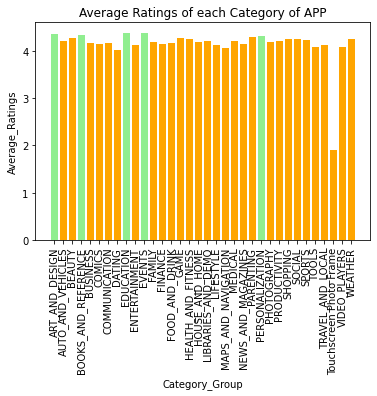

In [ ]:
colors = ['lightgreen' if x > 4.3 else 'orange' for x in df_1.Rating]

plt.bar(df_1.Category,df_1.Rating,width=0.8,color=colors)
plt.xlabel('Category_Group')
plt.ylabel('Average_Ratings')
plt.title('Average Ratings of each Category of APP')

#plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Just a trail made to get most repeated category which is having highest rating
df_1['Category'].max()
df_2 = df_copy[df_copy['Category'] == df_1['Category'].max()]
df_3 = df_2.sort_values(['Rating'],ascending =False).head(10)
df_3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3627,Weather forecast,WEATHER,4.8,159455.0,10M,1000000.0,Free,0.00,Everyone,Weather,"May 8, 2018",1.11.93,4.4 and up
3629,Live Weather Pro,WEATHER,4.8,892.0,17M,10000.0,Free,0.00,Everyone,Weather,"July 17, 2018",1.1,4.4 and up
3658,Weather Live Pro,WEATHER,4.8,17493.0,11M,100000.0,Paid,4.49,Everyone,Weather,"April 20, 2018",1.3,4.4 and up
3631,weather - weather forecast,WEATHER,4.7,11118.0,9.7M,1000000.0,Free,0.00,Everyone,Weather,"April 26, 2018",30,4.0 and up
8912,Weather Forecast Pro,WEATHER,4.7,14051.0,8.7M,100000.0,Paid,3.99,Everyone,Weather,"August 4, 2018",8.5,4.0 and up
7491,Fu*** Weather (Funny Weather),WEATHER,4.7,20001.0,Varies with device,1000000.0,Free,0.00,Mature 17+,Weather,"July 26, 2018",Varies with device,Varies with device
8153,WebCams,WEATHER,4.6,3963.0,23M,100000.0,Free,0.00,Everyone,Weather,"July 17, 2018",5.2.11,4.2 and up
3638,Klara weather,WEATHER,4.6,36900.0,4.8M,500000.0,Free,0.00,Everyone,Weather,"July 28, 2018",1.3.6,4.0 and up
3653,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,Varies with device,1000000.0,Free,0.00,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
3643,Live Weather & Daily Local Weather Forecast,WEATHER,4.5,13426.0,19M,1000000.0,Free,0.00,Everyone,Weather,"July 17, 2018",9.9.1.1910,4.1 and up


#### 2.2.Categoeries group vs Install

In [ ]:
df_4 = df_copy.groupby('Category',as_index=False)['Installs'].median()
df_4.head(5)

,Category,Installs
0,ART_AND_DESIGN,100000.0
1,AUTO_AND_VEHICLES,100000.0
2,BEAUTY,50000.0
3,BOOKS_AND_REFERENCE,10000.0
4,BUSINESS,1000.0


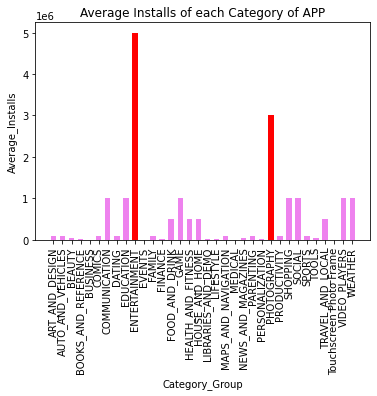

In [ ]:
colors = ['red' if x > 1000000 else 'violet' for x in df_4.Installs]

plt.bar(df_4.Category,df_4.Installs,width=0.6,color=colors)

plt.xlabel('Category_Group')
plt.ylabel('Average_Installs')
plt.title('Average Installs of each Category of APP')

plt.xticks(rotation=90)
plt.show()


#### 2.3. Top ten App in Enterrainment Category

In [ ]:
df_5 = df_copy[df_copy['Category'] == 'ENTERTAINMENT']
df_6 = df_5.sort_values(['Rating'],ascending =False).head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


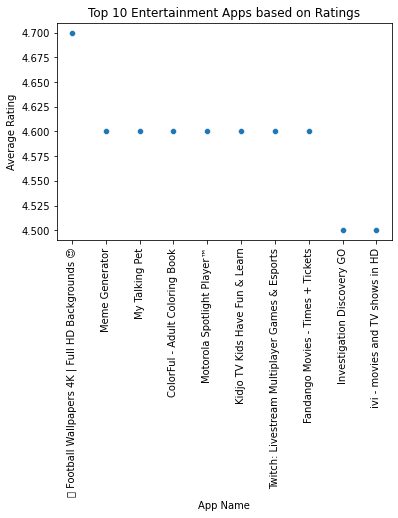

In [ ]:
# plt.bar(df_6['App'],df_6['Rating'])

plt.xlabel('App Name')
plt.ylabel('Average Rating')
plt.title('Top 10 Entertainment Apps based on Ratings')

# plt.xticks(rotation=90)
# plt.show()

sns.scatterplot(x=df_6['App'], y=df_6['Rating'])

plt.xticks(rotation=90)
